In [1]:
import numpy as np
import shutil as sh
import os
from scipy.spatial.distance import cdist
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
Data_location='/kaggle/input/animal-image-dataset-90-different-animals/animals/animals'
Database_location='/kaggle/working/Database'

if not os.path.isdir(Database_location):
    os.makedirs(Database_location)

count=0

for idx,folder in enumerate(os.listdir(Data_location)):
    
    for image in os.listdir(os.path.join(Data_location,folder)):
        sh.copy(os.path.join(Data_location,folder,image),Database_location)
        count+=1
        if count==10:
            count=0
            break
    

In [3]:
#best
mobile = mobilenet.MobileNet()
output=mobile.layers[-5].output
output=Flatten()(output)
model = Model(inputs=mobile.input, outputs=output)
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128    

In [4]:
def pridect(image):
    image=load_img(image,target_size=(224,224))
   
    image=img_to_array(image)
    image=preprocess_input(image)

    image=np.expand_dims(image,axis=0)
    
    vec=model.predict(image,verbose=0).squeeze()
    return vec

Shape of vector is: (1024,)


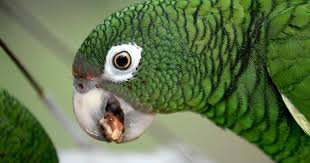

In [5]:
vec=pridect('/kaggle/working/Database/4aba5914cd.jpg')
print('Shape of vector is:',vec.shape)
load_img('/kaggle/working/Database/4aba5914cd.jpg')

In [6]:
name=[]
vec=None
for idx,image in enumerate(os.listdir(Database_location)):
    name.append(image)
    if idx==0:
        vec=pridect(os.path.join(Database_location,image))
    else:
        vec=np.vstack([vec,pridect(os.path.join(Database_location,image))])

In [7]:
print(name[:5])
vec.shape

['9eb30c93e8.jpg', '4b978e781d.jpg', '2a1a8a7e14.jpg', '3a97d032fe.jpg', '1a993de5a8.jpg']


(200, 1024)

In [ ]:
for idx,folder in enumerate(os.listdir(Data_location)):
    if id
    print(folder)

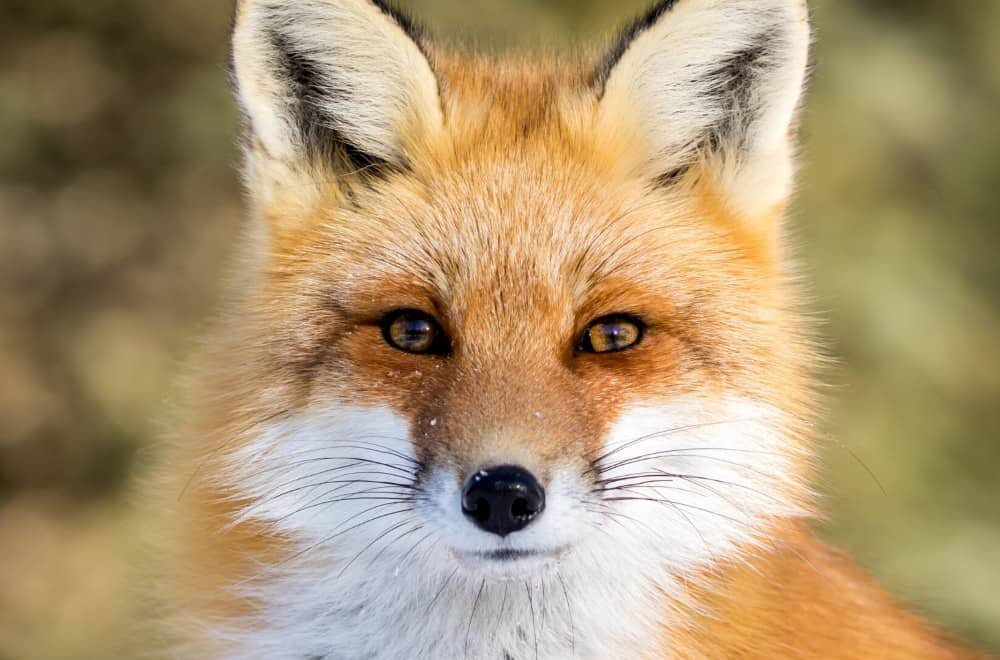

In [40]:
image='/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/fox/046e05e07b.jpg'
prediction=pridect(image)
index=cdist(np.expand_dims(prediction,axis=0),vec,'cosine')
similar_img=index.argsort()[0][1:5]
load_img(image)

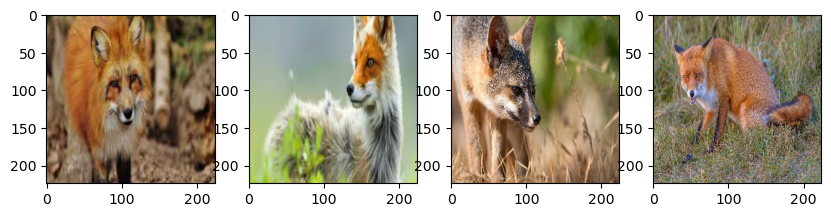

In [71]:
fig,ax=plt.subplots(1,4,figsize=(10,10))
for idx,img in enumerate(similar_img):
    img=cv2.imread(f'{Database_location}/{name[img]}')
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    img=cv2.resize(img,(224,224))
    ax[idx].imshow(img)


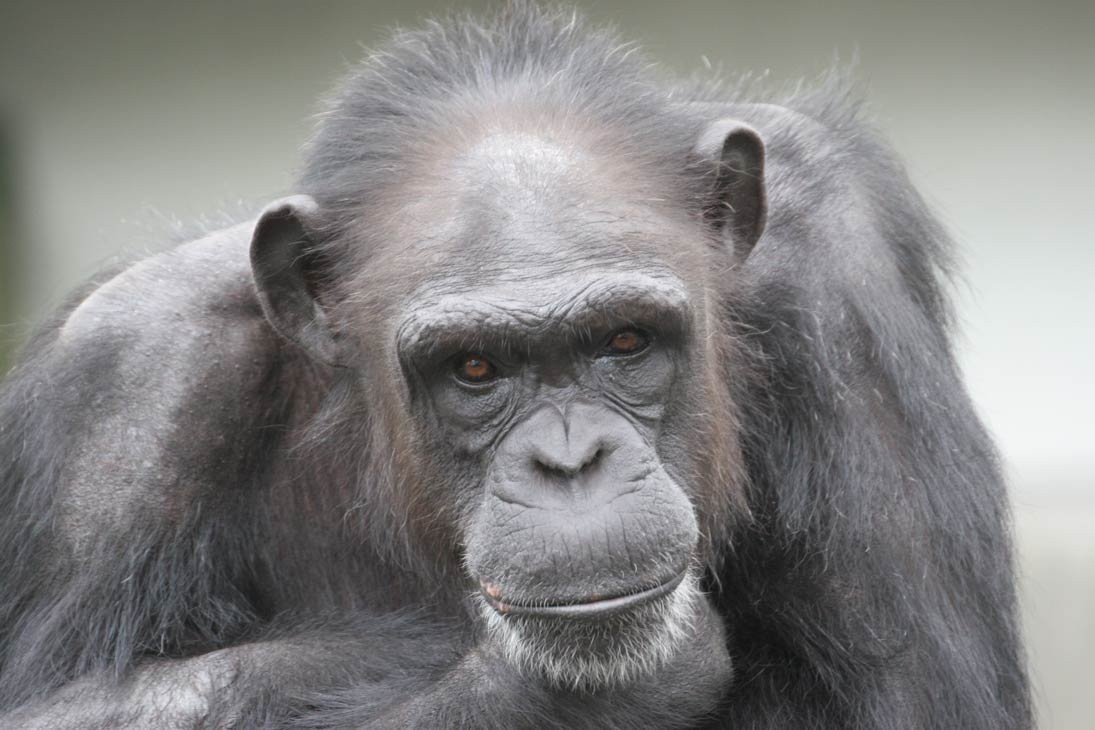

In [72]:
image='/kaggle/working/Database/6b69e9e2cd.jpg'
prediction=pridect(image)
index=cdist(np.expand_dims(prediction,axis=0),vec,'cosine')
similar_img=index.argsort()[0][1:5]
load_img(image)

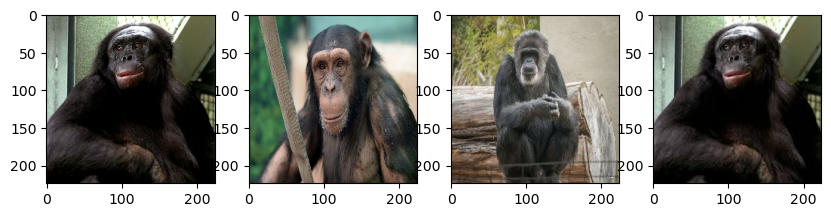

In [73]:
fig,ax=plt.subplots(1,4,figsize=(10,10))
for idx,img in enumerate(similar_img):
    img=cv2.imread(f'{Database_location}/{name[img]}')
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    img=cv2.resize(img,(224,224))
    ax[idx].imshow(img)
